# NEW Model dataset

In [1]:
import pandas as pd

# 指定第一行作为列名
his = pd.read_csv("0050.csv", header=1)  #從第二列開始提取
his

日期     開盤價     最高價     最低價     收盤價    成交量    成交金額  除權值  Unnamed: 8
0     20030630   37.10   37.40   36.90   37.10   9930     0.0  0.0         NaN
1     20030701   37.09   38.10   37.09   38.05  14290     0.0  0.0         NaN
2     20030702   38.17   38.82   38.10   38.69  16232     0.0  0.0         NaN
3     20030703   40.60   40.60   38.81   39.00  16839     0.0  0.0         NaN
4     20030704   39.10   39.26   38.75   39.26  12491     0.0  0.0         NaN
...        ...     ...     ...     ...     ...    ...     ...  ...         ...
4996  20230926  122.65  123.00  122.00  122.10  11388  1392.9  0.0         NaN
4997  20230927  121.85  122.30  121.55  122.15   7068   862.3  0.0         NaN
4998  20230928  122.75  123.15  122.05  122.65   5881   720.9  0.0         NaN
4999  20231002  123.60  124.50  123.60  124.25   6751   838.6  0.0         NaN
5000  20231003  123.95  124.15  123.45  123.50   5056   626.2  0.0         NaN

[5001 rows x 9 columns]

In [2]:
his = his.drop(columns=["成交金額","除權值","Unnamed: 8"]) #刪除不必要欄位
his['日期'] = pd.to_datetime(his['日期'], format='%Y%m%d') #修改日期格式
his = his[:-1] #載入資料最新日期還正在開盤，可能不準確，所以刪除

In [3]:
his.dtypes

日期     datetime64[ns]
開盤價           float64
最高價           float64
最低價           float64
收盤價           float64
成交量             int64
dtype: object

In [4]:
his.set_index("日期", inplace=True)
his

開盤價     最高價     最低價     收盤價    成交量
日期                                               
2003-06-30   37.10   37.40   36.90   37.10   9930
2003-07-01   37.09   38.10   37.09   38.05  14290
2003-07-02   38.17   38.82   38.10   38.69  16232
2003-07-03   40.60   40.60   38.81   39.00  16839
2003-07-04   39.10   39.26   38.75   39.26  12491
...            ...     ...     ...     ...    ...
2023-09-25  122.75  123.75  122.75  123.55   4337
2023-09-26  122.65  123.00  122.00  122.10  11388
2023-09-27  121.85  122.30  121.55  122.15   7068
2023-09-28  122.75  123.15  122.05  122.65   5881
2023-10-02  123.60  124.50  123.60  124.25   6751

[5000 rows x 5 columns]

In [5]:
#刪除過於久遠的資料
his.index
data = pd.to_datetime('2013-01-01')
for i in his.index:
    if i>data:
        new_index = his.index.get_loc(i)
        his = his[new_index:]
        break


In [6]:
his

開盤價     最高價     最低價     收盤價    成交量
日期                                               
2013-01-02   54.00   54.65   53.90   54.40  16487
2013-01-03   54.90   55.05   54.65   54.85  29020
2013-01-04   54.85   54.85   54.40   54.50   9837
2013-01-07   54.55   54.55   53.90   54.25   8910
2013-01-08   54.00   54.20   53.65   53.90  12507
...            ...     ...     ...     ...    ...
2023-09-25  122.75  123.75  122.75  123.55   4337
2023-09-26  122.65  123.00  122.00  122.10  11388
2023-09-27  121.85  122.30  121.55  122.15   7068
2023-09-28  122.75  123.15  122.05  122.65   5881
2023-10-02  123.60  124.50  123.60  124.25   6751

[2629 rows x 5 columns]

C:\Users\c0937\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\c0937\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\c0937\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\c0937\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\c0937\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.print_figure(bytes_

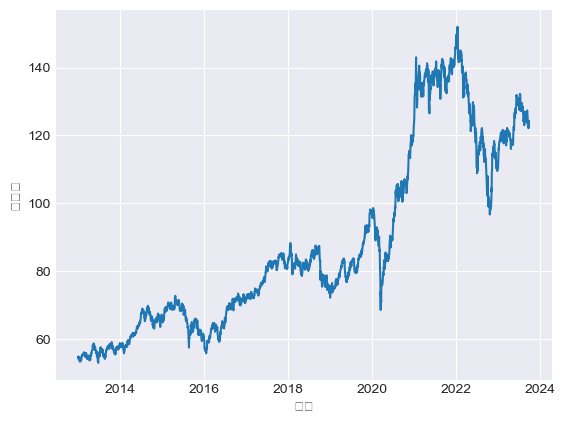

In [7]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")
plt.xlabel('日期')
plt.ylabel('收盤價')
plt.plot(his["收盤價"])
plt.show()

In [8]:
import numpy as np
PAST_WIN_LEN=100
CLASSES=["Bull","Bear"]
LABEL_BULL = CLASSES.index("Bull")
LABEL_BEAR = CLASSES.index("Bear")

x, y =[], []
for today_i in range(len(his)):
    day_k_past = his[:today_i+1] #歷遍所有資料
    day_k_forward = his[today_i+1:] #當前剩餘資料
    if len(day_k_past) < PAST_WIN_LEN or len(day_k_forward) < 1:
        continue
    day_k_past_win = day_k_past[-PAST_WIN_LEN:] #前100筆資料
    day_k_forward_win = day_k_forward[:1] #當前剩餘資料的第一筆
    
    today_price = day_k_past_win.iloc[-1]["收盤價"] #前100筆資料最後收盤價
    tomorrow_price = day_k_forward_win.iloc[0]["收盤價"]
    label = LABEL_BULL if tomorrow_price >today_price else LABEL_BEAR #如果明天的價格大於今天的價格則為牛否則為熊
    
    x.append(day_k_past_win.values) #將前100天資料放入x
    y.append(label) #將判斷出的標籤放入y
x, y = np.array(x), np.array(y)

In [9]:
x.shape

(2529, 100, 5)

In [10]:
y.shape

(2529,)

In [11]:
x

array([[[   54.  ,    54.65,    53.9 ,    54.4 , 16487.  ],
        [   54.9 ,    55.05,    54.65,    54.85, 29020.  ],
        [   54.85,    54.85,    54.4 ,    54.5 ,  9837.  ],
        ...,
        [   57.5 ,    57.7 ,    56.8 ,    56.95,  9240.  ],
        [   56.45,    56.75,    56.25,    56.7 ,  6538.  ],
        [   56.7 ,    56.8 ,    56.35,    56.6 ,  4243.  ]],

       [[   54.9 ,    55.05,    54.65,    54.85, 29020.  ],
        [   54.85,    54.85,    54.4 ,    54.5 ,  9837.  ],
        [   54.55,    54.55,    53.9 ,    54.25,  8910.  ],
        ...,
        [   56.45,    56.75,    56.25,    56.7 ,  6538.  ],
        [   56.7 ,    56.8 ,    56.35,    56.6 ,  4243.  ],
        [   56.55,    56.75,    56.35,    56.6 ,  3459.  ]],

       [[   54.85,    54.85,    54.4 ,    54.5 ,  9837.  ],
        [   54.55,    54.55,    53.9 ,    54.25,  8910.  ],
        [   54.  ,    54.2 ,    53.65,    53.9 , 12507.  ],
        ...,
        [   56.7 ,    56.8 ,    56.35,    56.6 ,  4243.  

In [12]:
y

array([1, 1, 0, ..., 0, 0, 0])

In [13]:
TRAIN_SPLIT, VAL_SPLIT, TEST_SPLIT = 0.7, 0.2, 0.1

test_split_index = -round(len(x) * TEST_SPLIT)
x_other, x_test = np.split(x, [test_split_index])
y_other, y_test = np.split(y, [test_split_index])

train_split_index = round(len(x) * TRAIN_SPLIT)
indexes = np.arange(len(x_other))
np.random.shuffle(indexes)
train_indexes, val_indexes = np.split(indexes, [train_split_index])
x_train, x_val = x_other[train_indexes] ,x_other[val_indexes]
y_train, y_val = y_other[train_indexes] ,y_other[val_indexes]


In [14]:
label_distribution = pd.DataFrame([{"Dataset":"train",
                                   "Bull":np.count_nonzero(y_train==LABEL_BULL),
                                   "BEAR":np.count_nonzero(y_train==LABEL_BEAR)},
                                  {"Dataset":"val",
                                   "Bull":np.count_nonzero(y_val==LABEL_BULL),
                                   "BEAR":np.count_nonzero(y_val==LABEL_BEAR)},
                                  {"Dataset":"test",
                                   "Bull":np.count_nonzero(y_test==LABEL_BULL),
                                   "BEAR":np.count_nonzero(y_test==LABEL_BEAR)}
                                  ])
label_distribution

Dataset  Bull  BEAR
0   train   901   869
1     val   262   244
2    test   121   132

In [15]:
x_train_bull = x_train[y_train==LABEL_BULL]


x_train_bear = x_train[y_train==LABEL_BEAR]

min_n_labels = min(len(x_train_bull), len(x_train_bear))
x_train_bull = x_train[np.random.choice(len(x_train_bull), min_n_labels, replace=False),:]
x_train_bear = x_train[np.random.choice(len(x_train_bear), min_n_labels, replace=False),:]
x_train = np.vstack([x_train_bull, x_train_bear])

y_train = np.array([LABEL_BEAR] * min_n_labels + [LABEL_BULL] * min_n_labels)

In [16]:
pd.DataFrame([{"Dataset":"train",
            "Bull": np.count_nonzero(y_train == LABEL_BEAR),
             "Bear": np.count_nonzero(y_train == LABEL_BULL)}])

Dataset  Bull  Bear
0   train   869   869

In [17]:
np.savez("NEW_datasets.npz", x_train=x_train, y_train=y_train, 
        x_val=x_val, y_val=y_val, x_test=x_test, y_test=y_test)